In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [212]:
def tt_svd(A, ranks):
    g = []
    n = list(A.shape)
    dim = len(n)

    A1 = A.reshape(n[0], np.prod(n[1:]))
    U, s, V = np.linalg.svd(A1, full_matrices=False)
    G1 = U[:,:ranks[0]]
    g.append(G1)
    B = np.diag(s[:ranks[0]]) @ V[:ranks[0], :]
    
    for k in range (1, dim - 1):
        B = B.reshape(ranks[k - 1] * n[k], np.prod(n[k+1:]))
        U, s, V = np.linalg.svd(B, full_matrices=False)
        Gk = U[:,:ranks[k]]
        Gk = Gk.reshape(ranks[k - 1], n[k], ranks[k])
        g.append(Gk)
        
        B = np.diag(s[:ranks[k]]) @ V[:ranks[k],:]

    g.append(B)
    return g

In [213]:
def restore_tensor(g):
    n = [g[i].shape[1] for i in range(len(g))]
    n[0] = g[0].shape[0]
    dim = len(n)
    
    ans = g[-1]
    for i in range(dim - 2, 0, -1):
        ans = (g[i] @ ans).reshape(g[i].shape[0], np.prod(n[i:dim]))
        
    ans = g[0] @ ans
    ans = ans.reshape(n)
    return ans

In [190]:
%%time

N = 32
A = np.zeros([N,N,N])
for i in range(N):
    for j in range(N):
        for k in range(N):
            A[i,j,k] = np.sin(2.*i+3.*j+4.*k)
            
g = tt_svd(A, [5,5])
B = restore_tensor(g)

err = np.linalg.norm(A - B)
print("error = ", err)

error =  5.490523704594753e-13
CPU times: user 86.3 ms, sys: 3.97 ms, total: 90.3 ms
Wall time: 70.8 ms


In [186]:
N = 128
A = np.zeros([N,N,N])
for i in range(N):
    for j in range(N):
        for k in range(N):
            A[i,j,k] = np.sin(2.*i+3.*j+4.*k)

g = tt_svd(A, [10, 10])
B = restore_tensor(g)
err = np.linalg.norm(A - B)
print("error = ", err)

error =  1.9335779015912675e-11


In [237]:
N = 50
dim = 4
A = np.zeros([N,N,N,N])
for i in range(N):
    for j in range(N):
        for k in range(N):
            for q in range(N):
                A[i,j,k, q] = np.sin(2*i+3*j+4*k) + 2*q #+ j

In [258]:
ranks = [1, 2, 3, 4, 5, 7, 10, 15, 20, 25, 30, 35, 40]
errt = []
calc_t = []

for exmp in ranks:
    start_time = time.time()
    g = tt_svd(A, [exmp, exmp, exmp])
    calc_t.append(time.time() - start_time)
    B = restore_tensor(g)
    errt.append(np.linalg.norm(A - B) / np.linalg.norm(A))

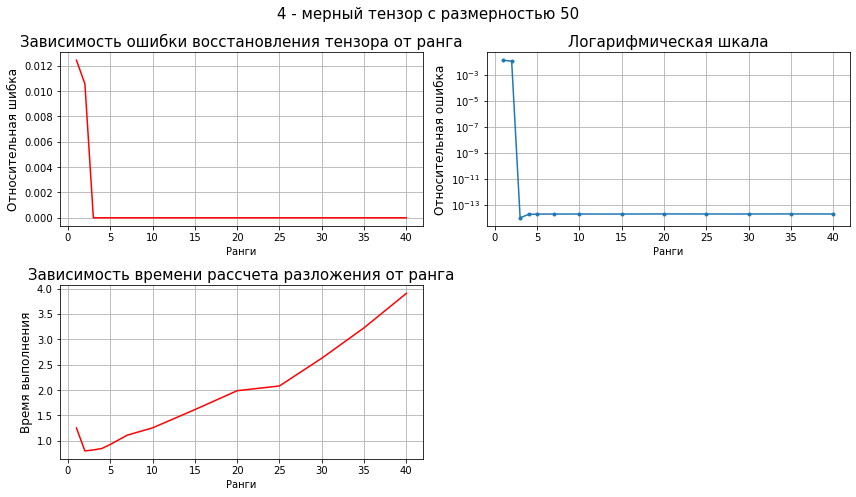

In [259]:
plt.figure(figsize=(12,7))
plt.suptitle(f"{dim} - мерный тензор с размерностью {N}", fontsize=15)

plt.subplot(2, 2, 1) 
plt.title('Зависимость ошибки восстановления тензора от ранга',fontsize=15)

plt.plot(ranks, errt, color='r')
plt.grid(True) 

plt.ylabel('Относительная шибка',  fontsize=12)
plt.xlabel('Ранги',  fontsize=10)


plt.subplot(2, 2, 2)
plt.title('Логарифмическая шкала',fontsize=15)

plt.plot(ranks, errt ,  marker='.')
plt.grid(True) 

plt.ylabel('Относительная ошибка',  fontsize=12)
plt.xlabel('Ранги',  fontsize=10)

plt.yscale('log')

plt.subplot(2, 2, 3) 
plt.title('Зависимость времени рассчета разложения от ранга',fontsize=15)

plt.plot(ranks, calc_t, color='r')
plt.grid(True) 

plt.ylabel('Время выполнения',  fontsize=12)
plt.xlabel('Ранги',  fontsize=10)

plt.tight_layout()
plt.show()